In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [9]:
data = pd.read_csv('News.csv' ,index_col=0)
data.head()

,title,text,subject,date,class
0.0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0.0
1.0,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0.0
2.0,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0.0
3.0,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0.0
4.0,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0.0


In [10]:
data.shape

(44940, 5)

In [11]:
data = data.drop(["title", "subject","date"], axis = 1)

In [12]:
data.dropna(inplace=True)


In [13]:
data['text'].fillna('', inplace=True)


In [15]:
mode_value = data['class'].mode()[0]  # Calculate the mode of the 'class' column
data['class'].fillna(mode_value, inplace=True)  # Impute missing values with the mode



In [17]:
data.isnull().sum()

text     0
class    0
dtype: int64

In [18]:
data = data.sample(frac=1)
data.reset_index(inplace=True)
data.drop(["index"], axis=1, inplace=True)


<Axes: xlabel='class', ylabel='count'>

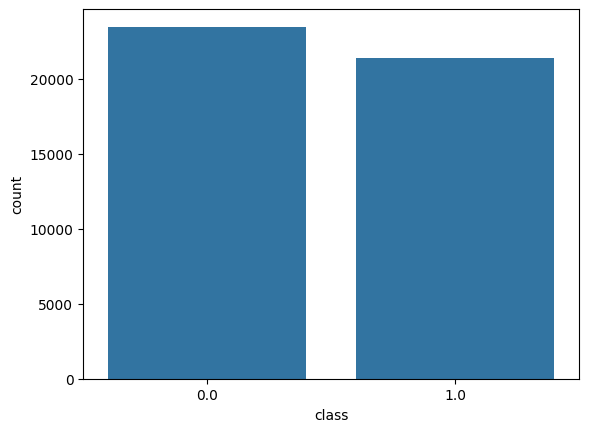

In [19]:
sns.countplot(data=data,
              x='class',
              order=data['class'].value_counts().index)

In [20]:
from tqdm import tqdm 
import re 
import nltk 
nltk.download('punkt') 
nltk.download('stopwords') 
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 
from nltk.stem.porter import PorterStemmer 
from wordcloud import WordCloud



[nltk_data] Downloading package punkt to C:\Users\SHRUTI
[nltk_data]     SHIVHARE\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\SHRUTI
[nltk_data]     SHIVHARE\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [21]:
def preprocess_text(text_data):
    preprocess_text = []
    for sentence in tqdm(text_data):
        # Check if the sentence is not NaN (a float in this case)
        if isinstance(sentence, str):
            sentence = re.sub(r'[^\w\s]', '', sentence)
            preprocess_text.append(' '.join(token.lower()
                                            for token in str(sentence).split()
                                            if token not in stopwords.words('english')))
    return preprocess_text

In [14]:
preprocess_review = preprocess_text(data['text'].values)
data['text'] = preprocess_review

  0%|          | 0/44940 [00:00<?, ?it/s]

100%|██████████| 44940/44940 [1:58:56<00:00,  6.30it/s]     


ValueError: Length of values (44919) does not match length of index (44940)

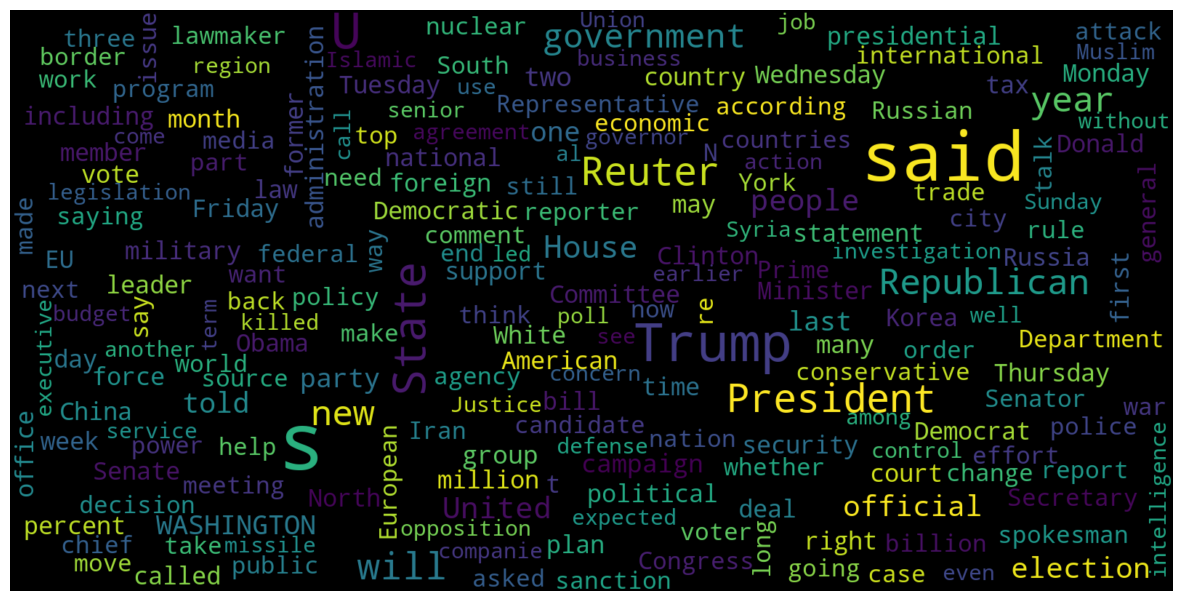

In [22]:
consolidated = ' '.join( 
    word for word in data['text'][data['class'] == 1].astype(str)) 
wordCloud = WordCloud(width=1600, 
                      height=800, 
                      random_state=21, 
                      max_font_size=110, 
                      collocations=False) 
plt.figure(figsize=(15, 10)) 
plt.imshow(wordCloud.generate(consolidated), interpolation='bilinear') 
plt.axis('off') 
plt.show() 

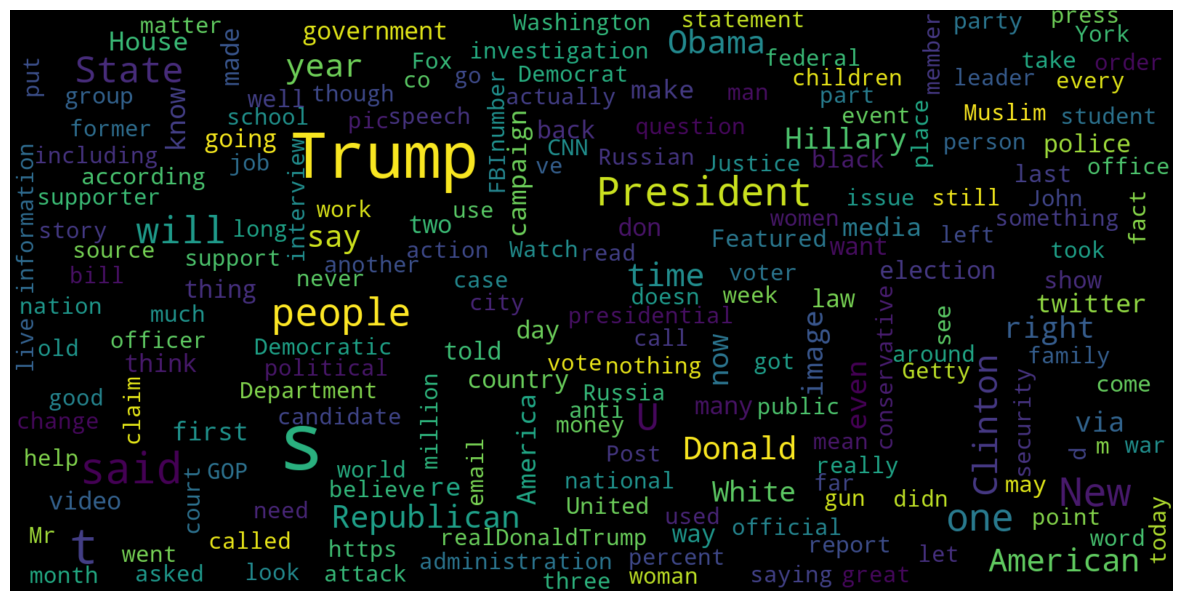

In [23]:
consolidated = ' '.join(
    word for word in data['text'][data['class'] == 0].astype(str))
wordCloud = WordCloud(width=1600,
                      height=800,
                      random_state=21,
                      max_font_size=110,
                      collocations=False)
plt.figure(figsize=(15, 10))
plt.imshow(wordCloud.generate(consolidated), interpolation='bilinear')
plt.axis('off')
plt.show()

<Axes: title={'center': 'Bar Chart of Top Words Frequency'}, xlabel='Top Words', ylabel='Count'>

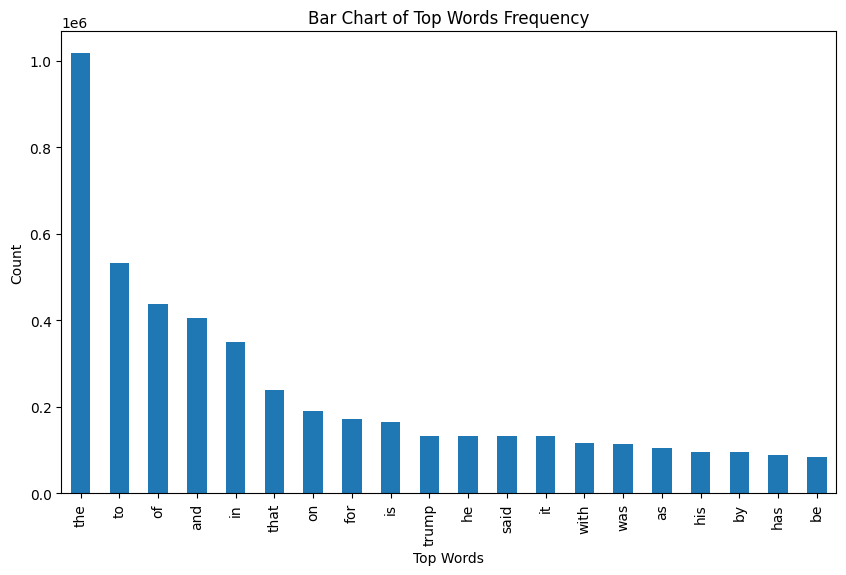

In [24]:
from sklearn.feature_extraction.text import CountVectorizer 
  
  
def get_top_n_words(corpus, n=None): 
    vec = CountVectorizer().fit(corpus) 
    bag_of_words = vec.transform(corpus) 
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) 
                  for word, idx in vec.vocabulary_.items()] 
    words_freq = sorted(words_freq, key=lambda x: x[1], 
                        reverse=True) 
    return words_freq[:n] 
  
  
common_words = get_top_n_words(data['text'], 20) 
df1 = pd.DataFrame(common_words, columns=['Review', 'count']) 
  
df1.groupby('Review').sum()['count'].sort_values(ascending=False).plot( 
    kind='bar', 
    figsize=(10, 6), 
    xlabel="Top Words", 
    ylabel="Count", 
    title="Bar Chart of Top Words Frequency"
) 

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

x_train, x_test, y_train, y_test = train_test_split(data['text'],
                                                    data['class'],
                                                    test_size=0.25)

In [26]:
from sklearn.feature_extraction.text import TfidfVectorizer 
  
vectorization = TfidfVectorizer() 
x_train = vectorization.fit_transform(x_train) 
x_test = vectorization.transform(x_test)

In [27]:
from sklearn.linear_model import LogisticRegression 
  
model = LogisticRegression() 
model.fit(x_train, y_train) 
  
# testing the model 
print(accuracy_score(y_train, model.predict(x_train))) 
print(accuracy_score(y_test, model.predict(x_test))) 


0.9910016927508687
0.9879732739420936


In [29]:
from sklearn.tree import DecisionTreeClassifier 
  
model = DecisionTreeClassifier() 
model.fit(x_train, y_train) 
  
# testing the model 
print(accuracy_score(y_train, model.predict(x_train))) 
print(accuracy_score(y_test, model.predict(x_test))) 

0.9999703026163395
0.9974164810690423


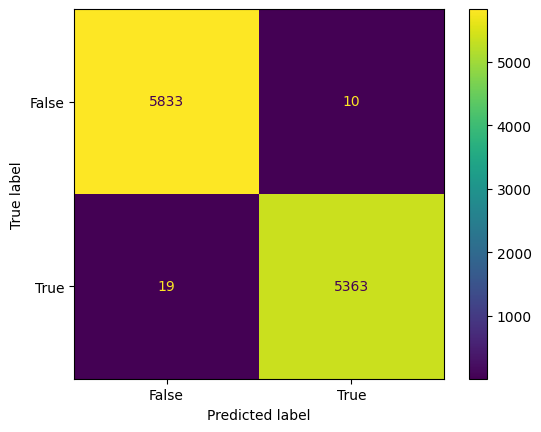

In [30]:
from sklearn import metrics 
cm = metrics.confusion_matrix(y_test, model.predict(x_test)) 
  
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, 
                                            display_labels=[False, True]) 
  
cm_display.plot() 
plt.show() 